In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import logging
import numpy as np
import pandas as pd
from plotting_utils import figure_path
from peak_utils import load_peaks, sample_cutoff, pileup_cutoff
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('RBP')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
plt.rc('font', **{'family':'sans-serif',
                  'sans-serif':'Arial'})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
project_path = '/stor/work/Lambowitz/yaojun/Work/cfNA/tgirt_map'
peak_path = project_path + '/bed_files/merged_bed/MACS2/annotated'
peak_tsv = peak_path + '/unfragmented.filtered.new.tsv'
peaks_df = load_peaks(peak_tsv)\
    .query('sample_count >= %i & pileup >= %i' %(sample_cutoff, pileup_cutoff))
peaks_df.head()

,chrom,start,end,peakname,score,fc,log10p,log10q,pileup,sample_count,sense_gname,sense_gtype,strand,sense_overlapped,antisense_gname,antisense_gtype,antisense_overlapped,pvalue,FDR,is_sense
0,chr6,95156837,95156909,unfragmented.filtered.rvs_peak_23480,49739,1218.79724,4981.70361,4973.91650,1429.0,15.0,MTPAP,RBP,-,26,.,.,.,0.0,0.0,Sense
1,chr11,65273309,65273587,unfragmented.filtered.fwd_peak_5154,22302,531.51056,2237.73486,2230.29028,538.0,15.0,GTF2F1,RBP,+,125,TALAM1,Long RNA,278,0.0,0.0,Sense
2,chr16,24228399,24228506,unfragmented.filtered.fwd_peak_10583,15882,410.57184,1595.27893,1588.22900,420.0,14.0,GA-rich,Repeats,+,98,.,.,.,0.0,0.0,Sense
3,chr16,67844895,67845028,unfragmented.filtered.rvs_peak_10287,14847,370.41833,1491.71484,1484.75000,375.0,15.0,FLAM_C,Repeats,-,131,TSNAXIP1,Long RNA,133,0.0,0.0,Sense
4,chr19,11333579,11333670,unfragmented.filtered.rvs_peak_12880,14332,379.56116,1440.11218,1433.23572,390.0,15.0,EFTUD2,RBP,-,58,.,.,.,0.0,0.0,Sense


In [34]:
peaks_df.query('sense_gname == "EFTUD2"').query('sense_gtype == "RBP"')

,chrom,start,end,peakname,score,fc,log10p,log10q,pileup,sample_count,sense_gname,sense_gtype,strand,sense_overlapped,antisense_gname,antisense_gtype,antisense_overlapped,pvalue,FDR,is_sense
4,chr19,11333579,11333670,unfragmented.filtered.rvs_peak_12880,14332,379.56116,1440.11218,1433.23572,390.0,15.0,EFTUD2,RBP,-,58,.,.,.,0.000000e+00,0.000000e+00,Sense
99,chr16,2149771,2149861,unfragmented.filtered.rvs_peak_9606,907,34.15693,96.29121,90.78667,34.0,11.0,EFTUD2,RBP,-,42,.,.,.,5.114345e-97,2.799390e-94,Sense
196,chr11,45944515,45944608,unfragmented.filtered.fwd_peak_4921,531,23.16680,58.46657,53.16454,23.0,10.0,EFTUD2,RBP,+,54,.,.,.,3.415309e-59,9.696445e-57,Sense
244,chr5,40834306,40834691,unfragmented.filtered.rvs_peak_21394,464,20.38564,51.65974,46.47720,20.0,9.0,EFTUD2,RBP,-,132,.,.,.,2.189072e-52,5.057089e-50,Sense
263,chr11,61732459,61732574,unfragmented.filtered.rvs_peak_4639,432,18.58004,48.36536,43.21830,18.0,9.0,EFTUD2,RBP,-,88,BEST1,Long RNA,115,4.311615e-49,9.223972e-47,Sense
309,chr19,49119133,49119461,unfragmented.filtered.rvs_peak_13514,380,17.47340,43.19494,38.09456,17.0,10.0,EFTUD2,RBP,-,153,.,.,.,6.383517e-44,1.171732e-41,Sense
335,chr20,44576077,44576162,unfragmented.filtered.fwd_peak_17727,349,15.66356,40.01713,34.90463,15.0,7.0,EFTUD2,RBP,+,50,.,.,.,9.613245e-41,1.636056e-38,Sense
382,chr17,60102067,60102144,unfragmented.filtered.rvs_peak_11491,314,13.79217,36.45353,31.44091,13.0,5.0,EFTUD2,RBP,-,31,.,.,.,3.519411e-37,5.202649e-35,Sense
488,chr19,3982255,3982423,unfragmented.filtered.rvs_peak_12697,249,11.79839,29.89499,24.98619,11.0,6.0,EFTUD2,RBP,-,111,.,.,.,1.273532e-30,1.493745e-28,Sense
492,chr11,66444337,66444517,unfragmented.filtered.rvs_peak_4780,248,13.39450,29.78605,24.87887,13.0,8.0,EFTUD2,RBP,-,26,.,.,.,1.636628e-30,1.908572e-28,Sense


In [54]:
RBP = peaks_df\
    .assign(sense_overlapped = lambda d: d.sense_overlapped.where(d.sense_gtype == "RBP", 0)) \
    .pipe(lambda d: d[~d.sense_gname.str.contains(',')]) \
    .assign(sense_overlapped = lambda d: d.sense_overlapped.astype(int))\
    .query('sense_overlapped > 0')
RBP.head()

,chrom,start,end,peakname,score,fc,log10p,log10q,pileup,sample_count,sense_gname,sense_gtype,strand,sense_overlapped,antisense_gname,antisense_gtype,antisense_overlapped,pvalue,FDR,is_sense
0,chr6,95156837,95156909,unfragmented.filtered.rvs_peak_23480,49739,1218.79724,4981.70361,4973.91650,1429.0,15.0,MTPAP,RBP,-,26,.,.,.,0.0,0.0,Sense
1,chr11,65273309,65273587,unfragmented.filtered.fwd_peak_5154,22302,531.51056,2237.73486,2230.29028,538.0,15.0,GTF2F1,RBP,+,125,TALAM1,Long RNA,278,0.0,0.0,Sense
4,chr19,11333579,11333670,unfragmented.filtered.rvs_peak_12880,14332,379.56116,1440.11218,1433.23572,390.0,15.0,EFTUD2,RBP,-,58,.,.,.,0.0,0.0,Sense
5,chrX,12994895,12995346,unfragmented.filtered.fwd_peak_30445,11437,318.51666,1150.45691,1143.78711,331.0,15.0,SRSF7,RBP,+,140,.,.,.,0.0,0.0,Sense
6,chr4,140222882,140222997,unfragmented.filtered.fwd_peak_22177,9262,275.12173,932.83197,926.23804,344.0,14.0,FXR2,RBP,+,92,NDUFC1,Long RNA,115,0.0,0.0,Sense


In [55]:
bins = np.arange(0,RBP.sense_overlapped.astype(int).max(), 5)

INFO:RBP:Plotted: /stor/work/Lambowitz/yaojun/Work/cfNA/tgirt_map/figure/histogram_RBP.pdf


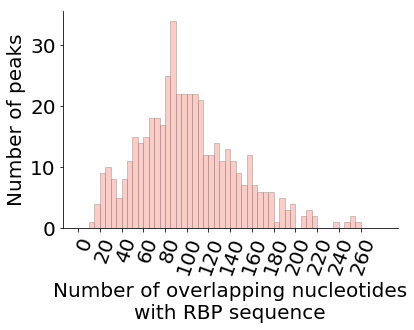

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
#count, bins = np.histogram(RBP.sense_overlapped.astype(int), bins=50)
sns.distplot(RBP.sense_overlapped, 
        color='salmon',  bins=bins, kde=False,
       hist_kws = {'histtype':'bar', 'ec':'gray'})
sns.despine()
ax.set_xlabel('Number of overlapping nucleotides\nwith RBP sequence')
ax.set_ylabel('Number of peaks')
xr = np.arange(bins[0],bins[-1], 20)
ax.set_xticks(xr)
xt = ax.set_xticklabels(xr, rotation=70, rotation_mode='anchor', ha='right')
figname = figure_path + '/histogram_RBP.pdf'
plt.savefig(figname, bbox_inches='tight')
logger.info('Plotted: '+ figname)

In [53]:
len(bins)

57

In [20]:
bins

array([ 11.  ,  16.42,  21.84,  27.26,  32.68,  38.1 ,  43.52,  48.94,
        54.36,  59.78,  65.2 ,  70.62,  76.04,  81.46,  86.88,  92.3 ,
        97.72, 103.14, 108.56, 113.98, 119.4 , 124.82, 130.24, 135.66,
       141.08, 146.5 , 151.92, 157.34, 162.76, 168.18, 173.6 , 179.02,
       184.44, 189.86, 195.28, 200.7 , 206.12, 211.54, 216.96, 222.38,
       227.8 , 233.22, 238.64, 244.06, 249.48, 254.9 , 260.32, 265.74,
       271.16, 276.58, 282.  ])